# SVD y PCA: Ejercicio 2

## 1 Bajar los datos con columnas [’target’,’columna1’, ’columna2’, . . ., ’columnaN’] e.g. [’municipio’,’indicador uno’,’indicador dos’, ’indicador 20’]:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = 'Datos.csv'
df = pd.read_csv(data)
df.head()

,Target,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6
0,a,5.44,4.27,6.03,5.86,4.73,4.05
1,a,7.25,4.36,5.57,7.56,5.68,3.00
2,a,5.62,5.22,5.46,7.75,4.11,4.74
3,a,6.84,4.72,5.71,5.78,3.10,5.32
4,b,5.71,6.15,5.67,7.26,5.55,4.32


## 2 Se definen las ‘features’ (las columnas del dataframe data a las que les vamos a aplicar el PCA):

In [3]:
features = ['Columna1', 'Columna2', 'Columna3', 'Columna4', 'Columna5', 'Columna6']

## 3 Se separan las características:

In [4]:
x = df.loc[:, features].values

## 4 Se separan el target:

In [5]:
y = df.loc[:,['Target']].values

## 5 Se estandarizan las características:

In [6]:
 from sklearn.preprocessing import StandardScaler

In [7]:
x = StandardScaler().fit_transform(x)
x

array([[-1.21463437, -1.3418933 , -0.46657647, -1.35271458, -1.27908834,
        -0.98769258],
       [-0.24388035, -1.26635279, -0.94693122, -0.3961471 , -0.8856112 ,
        -1.57118527],
       [-1.11809529, -0.54452121, -1.06179866, -0.28923662, -1.53588395,
        -0.60425453],
       [-0.4637749 , -0.96419073, -0.8007363 , -1.39772952, -1.95421228,
        -0.28194428],
       [-1.06982576,  0.23606411, -0.84250628, -0.56495313, -0.93945544,
        -0.8376516 ],
       [-0.4637749 , -0.73756919,  0.12864573, -0.19920674, -1.96663787,
        -0.25971599],
       [-1.21463437,  0.16052359, -0.43524898, -0.25547542, -0.91046238,
        -0.41531404],
       [-0.37259911, -0.01573761, -1.13489613, -0.56495313, -1.76782837,
        -0.04854721],
       [-1.49888831,  0.90753534,  0.83873537, -2.7875658 ,  0.52262278,
        -0.74873843],
       [ 1.23102217, -1.3418933 , -1.40640099, -1.75222218, -1.014009  ,
        -0.27638721],
       [-2.45355248, -0.51094764,  1.54882502, -0.

### ¿Qué efecto hace la función StandardScaler a x? ¿Podrías explicarlo en términos de lo visto en álgebra lineal y estadístico?
La función StandardScaler estandariza los datos, es decir, resta a los elementos de las columnas de la matriz su media y luego estandaríza estos datos para que su varianza sea igual a 1. 
En términos de álgebra lineal, en el caso de la resta de las medias, se trataría de obtener la matriz de datos centrados. En términos estadísticos es obtener una matriz de datos cuyas columnas son desplazadas para que tengan media igual a 0 y varianza = 1, el equivalente a desplazar datos que presentan una distribución normal, a una normal estándar. 

Ejemplo con la columna 2:

In [8]:
x2 = x[:, 1]
print(np.mean(x2))
print(np.var(x2))

-3.3306690738754696e-16
1.0


## 7 Dejemos que sklearn haga su trabajo, por ejemplo pidiéndole 2 componentes:

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComponents

array([[-2.01270507e+00, -4.45244813e-01],
       [-1.64737429e+00, -7.07404376e-01],
       [-9.12343263e-01, -1.08981442e+00],
       [-1.70143764e+00, -1.48597641e+00],
       [-6.01105113e-01, -8.30959336e-01],
       [-1.43735008e+00, -8.30509723e-01],
       [-4.02997051e-01, -4.66508972e-01],
       [-6.01649218e-01, -1.75306556e+00],
       [-1.04266407e+00,  7.95769427e-01],
       [-1.52471247e+00, -1.81487235e+00],
       [-5.55817088e-01,  2.45234002e+00],
       [-2.37711008e+00,  1.23921049e+00],
       [-3.82476880e-01, -1.20621686e+00],
       [-2.98615899e-03,  8.98191259e-01],
       [-4.44978154e-01,  2.16060391e-01],
       [-1.15227169e+00, -6.97299796e-01],
       [-2.21299569e+00, -1.43125600e+00],
       [-1.34277622e+00, -7.40576321e-01],
       [-6.25907327e-01,  1.00985942e+00],
       [ 9.98372634e-01,  1.57700634e-01],
       [-6.23048484e-01, -7.15498479e-01],
       [-9.35378711e-01, -1.97251719e-02],
       [-1.59933819e+00,  1.22381080e+00],
       [ 1.

### ¿Cuál es el máximo de componentes principales que puedo pedir?
El número máximo de componentes que se podrían pedir es n-1 en una matriz de n columnas. En el caso de nuestro ejercicio, podremos pedir como máximo el número de columnas definidas como "features", 6.

In [10]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalComponents

array([[-2.01270507e+00, -4.45244813e-01,  1.84175855e+00,
         8.80604884e-02, -2.74584585e-01,  4.59018157e-01],
       [-1.64737429e+00, -7.07404376e-01,  1.07650577e+00,
        -9.88675553e-01,  5.15045662e-01,  5.94802109e-01],
       [-9.12343263e-01, -1.08981442e+00,  1.79652712e+00,
        -4.00872045e-01, -1.57245381e-01, -2.20856935e-01],
       [-1.70143764e+00, -1.48597641e+00,  1.30814455e+00,
         2.46364617e-01, -7.97657032e-01,  3.56097191e-01],
       [-6.01105113e-01, -8.30959336e-01,  1.53292373e+00,
         2.44487100e-01,  5.47044628e-01, -2.29720048e-01],
       [-1.43735008e+00, -8.30509723e-01,  7.72842468e-01,
        -2.69876053e-01, -8.43456310e-01, -7.83062366e-01],
       [-4.02997051e-01, -4.66508972e-01,  1.42548066e+00,
         2.04294279e-01,  1.14869292e-01, -5.38774424e-01],
       [-6.01649218e-01, -1.75306556e+00,  1.11557608e+00,
         6.97089888e-02, -3.94614737e-01, -1.83036120e-01],
       [-1.04266407e+00,  7.95769427e-01,  1.144

## 8 Fácilmente se puede formar el DataFrame de componentes principales:

In [11]:
matrixComponents = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 
                                                                       'principal component 3' , 'principal component 4',
                                                                       'principal component 5', 'principal component 6'])

In [12]:
matrixComponents.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-2.012705,-0.445245,1.841759,0.088060,-0.274585,0.459018
1,-1.647374,-0.707404,1.076506,-0.988676,0.515046,0.594802
2,-0.912343,-1.089814,1.796527,-0.400872,-0.157245,-0.220857
3,-1.701438,-1.485976,1.308145,0.246365,-0.797657,0.356097
4,-0.601105,-0.830959,1.532924,0.244487,0.547045,-0.229720


### ¿Cómo sé qué tantas componentes es pertinente tomar en cuenta para mis datos?
Tantas como sea necesario para explicar satisfactoriamente el fenómeno estudiado.

## 9 Usa los comandos explained_variance_ o explained_variance_ratio_ para tomar una decisión informada. Por ejemplo, grafica número de componentes vs el radio de la varianza explicada.

In [13]:
print(pca.explained_variance_.round(2))
print(pca.explained_variance_ratio_.round(2))

[1.91 1.11 1.04 1.03 0.6  0.4 ]
[0.31 0.18 0.17 0.17 0.1  0.06]


### Graficamos la suma acumulada del radio de la varianza explicada

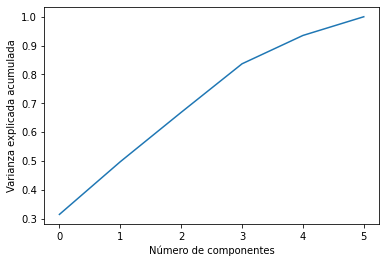

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada');

### Como se observa, las primeras 4 componentes explican el 83% de la varianza. Con la primera componente explicando 31%, mientras que las 2, 3 y 4 la varianza en un rango muy similar. Si tomamos la primera y una de las otras 3 ya estaríamos explicando cerca de 50% de la varianza.

## 10 Grafica las dos o tres primeras componentes principales.
### En este caso se grafica la componente 1 contra las otras 3 componentes que explican 17% o 18% de la varianza cada una.

In [15]:
contarget = pd.concat([df,matrixComponents], axis = 1) 

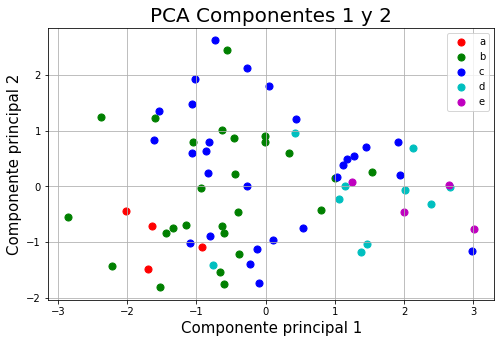

In [16]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15) 
ax.set_ylabel('Componente principal 2', fontsize = 15) 
ax.set_title('PCA Componentes 1 y 2', fontsize = 20) 
targets = ['a', 'b', 'c', 'd', 'e'] 
colors = ['r', 'g', 'b','c','m'] 
for target, color in zip(targets,colors): 
    indicesToKeep = contarget['Target'] == target  
    ax.scatter(contarget.loc[indicesToKeep, 'principal component 1'] , 
               contarget.loc[indicesToKeep, 'principal component 2'] , 
               c = color , s = 50) 
    ax.legend(targets) 
    ax.grid()

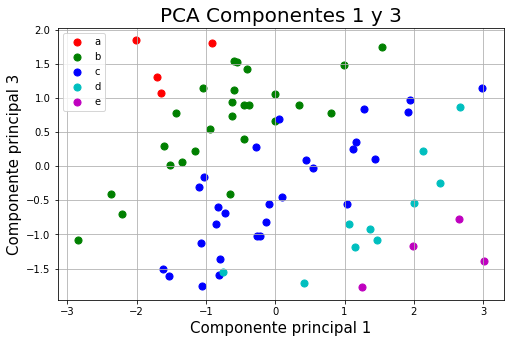

In [17]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15) 
ax.set_ylabel('Componente principal 3', fontsize = 15) 
ax.set_title('PCA Componentes 1 y 3', fontsize = 20) 
targets = ['a', 'b', 'c', 'd', 'e'] 
colors = ['r', 'g', 'b','c','m'] 
for target, color in zip(targets,colors): 
    indicesToKeep = contarget['Target'] == target  
    ax.scatter(contarget.loc[indicesToKeep, 'principal component 1'] , 
               contarget.loc[indicesToKeep, 'principal component 3'] , 
               c = color , s = 50) 
    ax.legend(targets) 
    ax.grid()

### Al graficar las componentes 1 y 3, se observan agrupamientos al señalar con color los resultados de la columna target. Estas dos componentes estarían explicando el 48% de la varianza.

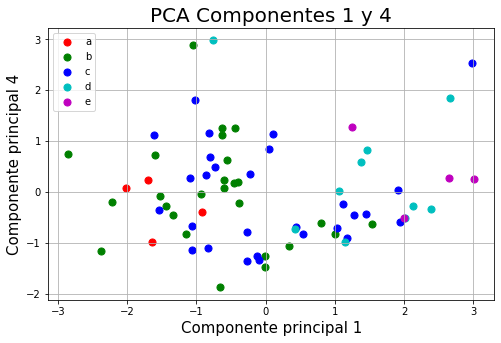

In [18]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15) 
ax.set_ylabel('Componente principal 4', fontsize = 15) 
ax.set_title('PCA Componentes 1 y 4', fontsize = 20) 
targets = ['a', 'b', 'c', 'd', 'e'] 
colors = ['r', 'g', 'b','c','m'] 
for target, color in zip(targets,colors): 
    indicesToKeep = contarget['Target'] == target  
    ax.scatter(contarget.loc[indicesToKeep, 'principal component 1'] , 
               contarget.loc[indicesToKeep, 'principal component 4'] , 
               c = color , s = 50) 
    ax.legend(targets) 
    ax.grid()